In [6]:

## before starting we have to moubt the drive and set the gpu settings 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np

In [9]:
import seaborn as sns  ## data manipulation
import matplotlib.pyplot as plt  ## plotting the graphs,data visualization
import plotly.express as px ## world mapping

In [10]:
data=pd.read_csv("/content/covid_19_data.csv")
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0


In [11]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              285307 non-null  int64  
 1   ObservationDate  285307 non-null  object 
 2   Province/State   212318 non-null  object 
 3   Country/Region   285307 non-null  object 
 4   Last Update      285307 non-null  object 
 5   Confirmed        285307 non-null  float64
 6   Deaths           285307 non-null  float64
 7   Recovered        285307 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.4+ MB


In [13]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
285302,285303,05/02/2021,Zaporizhia Oblast,Ukraine,2021-05-03 04:20:39,96531.0,1919.0,78700.0
285303,285304,05/02/2021,Zeeland,Netherlands,2021-05-03 04:20:39,26045.0,233.0,0.0
285304,285305,05/02/2021,Zhejiang,Mainland China,2021-05-03 04:20:39,1344.0,1.0,1322.0
285305,285306,05/02/2021,Zhytomyr Oblast,Ukraine,2021-05-03 04:20:39,84641.0,1597.0,68529.0
285306,285307,05/02/2021,Zuid-Holland,Netherlands,2021-05-03 04:20:39,359327.0,4138.0,0.0


In [14]:
data=data.drop(['Last Update'],axis=1)
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [15]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     72989
Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [16]:
## how to fill the values???
##1) find out which country has the maximum cases....
##2) we can drop it also...(nota good option)
##3) we can fill with unknown values

In [17]:
freq=data['Province/State'].value_counts()
freq

Unknown                         3799
Amazonas                        1028
Diamond Princess cruise ship     870
Grand Princess                   828
Punjab                           654
                                ... 
Harrison County, KY                1
Queens County, NY                  1
Wuhan Evacuee                      1
Bennington County, VT              1
Shasta County, CA                  1
Name: Province/State, Length: 737, dtype: int64

In [18]:
data["Province/State"].fillna("UNKNOWN",inplace=True)

In [19]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [20]:
data.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0


In [21]:
data['ObservationDate']=pd.to_datetime(data["ObservationDate"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              285307 non-null  int64         
 1   ObservationDate  285307 non-null  datetime64[ns]
 2   Province/State   285307 non-null  object        
 3   Country/Region   285307 non-null  object        
 4   Confirmed        285307 non-null  float64       
 5   Deaths           285307 non-null  float64       
 6   Recovered        285307 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 15.2+ MB


In [22]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [23]:
## I will add one column for active cases
## active= Confirmed-Recovered-Deaths

In [24]:
data['Active']= data['Confirmed']-data["Recovered"]-data["Deaths"]
data.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0


In [25]:
## 1) TO find the country having maximum number of active cases---top 20 country
## 2) Plot tthem in the world map to analyse it better
## 3) we can take the latest date data also----like from last date till today


In [26]:
data.tail(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
285305,285306,2021-05-02,Zhytomyr Oblast,Ukraine,84641.0,1597.0,68529.0,14515.0
285306,285307,2021-05-02,Zuid-Holland,Netherlands,359327.0,4138.0,0.0,355189.0


In [27]:
latest=data[data["ObservationDate"]=="2021-05-02"]
latest

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
284543,284544,2021-05-02,UNKNOWN,Afghanistan,60122.0,2637.0,53391.0,4094.0
284544,284545,2021-05-02,UNKNOWN,Albania,131238.0,2397.0,110920.0,17921.0
284545,284546,2021-05-02,UNKNOWN,Algeria,122522.0,3270.0,85398.0,33854.0
284546,284547,2021-05-02,UNKNOWN,Andorra,13282.0,127.0,12753.0,402.0
284547,284548,2021-05-02,UNKNOWN,Angola,26993.0,602.0,23913.0,2478.0
...,...,...,...,...,...,...,...,...
285302,285303,2021-05-02,Zaporizhia Oblast,Ukraine,96531.0,1919.0,78700.0,15912.0
285303,285304,2021-05-02,Zeeland,Netherlands,26045.0,233.0,0.0,25812.0
285304,285305,2021-05-02,Zhejiang,Mainland China,1344.0,1.0,1322.0,21.0
285305,285306,2021-05-02,Zhytomyr Oblast,Ukraine,84641.0,1597.0,68529.0,14515.0


In [28]:
len(latest)

764

In [29]:
world=latest.groupby("Country/Region")["Confirmed","Deaths","Recovered","Active"].sum()
world=world.reset_index()
world

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,60122.0,2637.0,53391.0,4094.0
1,Albania,131238.0,2397.0,110920.0,17921.0
2,Algeria,122522.0,3270.0,85398.0,33854.0
3,Andorra,13282.0,127.0,12753.0,402.0
4,Angola,26993.0,602.0,23913.0,2478.0
...,...,...,...,...,...
189,Vietnam,2962.0,35.0,2549.0,378.0
190,West Bank and Gaza,297638.0,3272.0,275392.0,18974.0
191,Yemen,6341.0,1233.0,2875.0,2233.0
192,Zambia,91693.0,1253.0,90082.0,358.0


In [30]:
## which country has the maximum cases
## world map...use plotly

In [31]:
px.choropleth() ## this function represents each row of the dataframe by a colored reion mark on the map
#world_map=px.choropleth(world,locations='Country/Region',locationmode="country names", color="Active")
world_map=px.choropleth(world,locations='Country/Region',locationmode="country names",color="Active")
world_map

In [32]:
world_map=px.choropleth(world,locations='Country/Region',locationmode="country names",color="Active",color_continuous_scale="reds", range_color=[0,500000])
world_map

In [33]:
## Plot the active cases VS DataGraph
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.0


In [34]:
total_active=data.groupby("ObservationDate")["Active"].sum().reset_index()
total_active

,ObservationDate,Active
0,2020-01-22,510.0
1,2020-01-23,1003.0
2,2020-01-24,876.0
3,2020-01-25,1353.0
4,2020-01-26,2006.0
...,...,...
462,2021-04-28,59629150.0
463,2021-04-29,59804446.0
464,2021-04-30,59982291.0
465,2021-05-01,60084175.0


In [35]:
## lets plot the graph--pointplot graph : it is the combination of  line graph, scatter graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



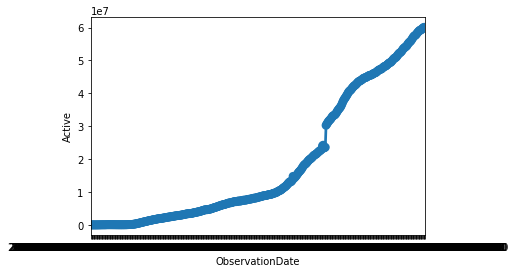

In [36]:
sns.pointplot(total_active["ObservationDate"], total_active["Active"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



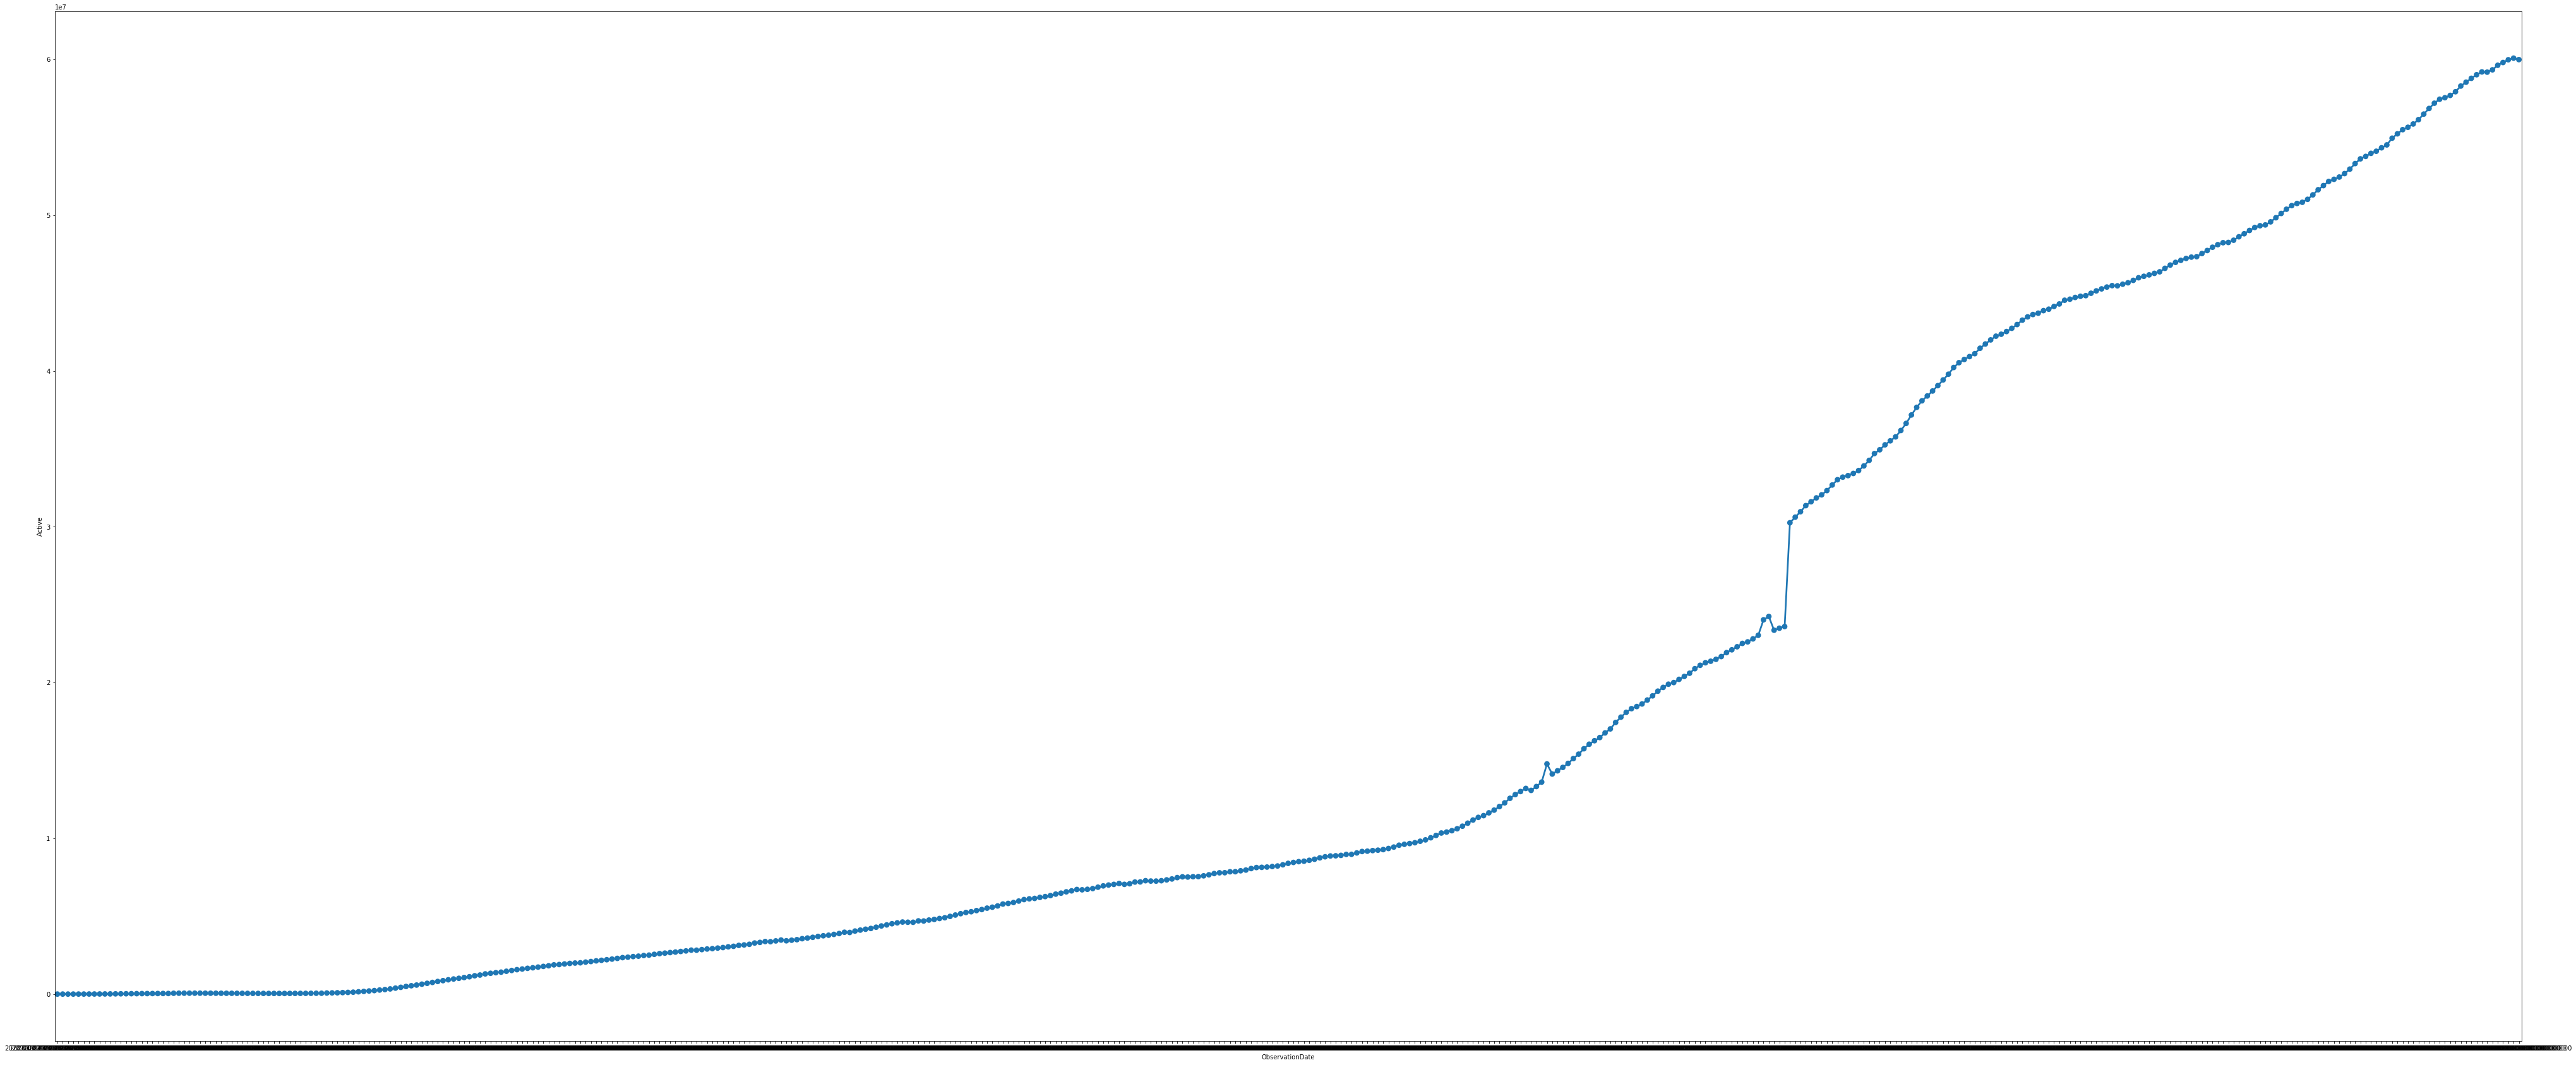

In [37]:
plt.figure(figsize=(70,30))
sns.pointplot(total_active["ObservationDate"], total_active["Active"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



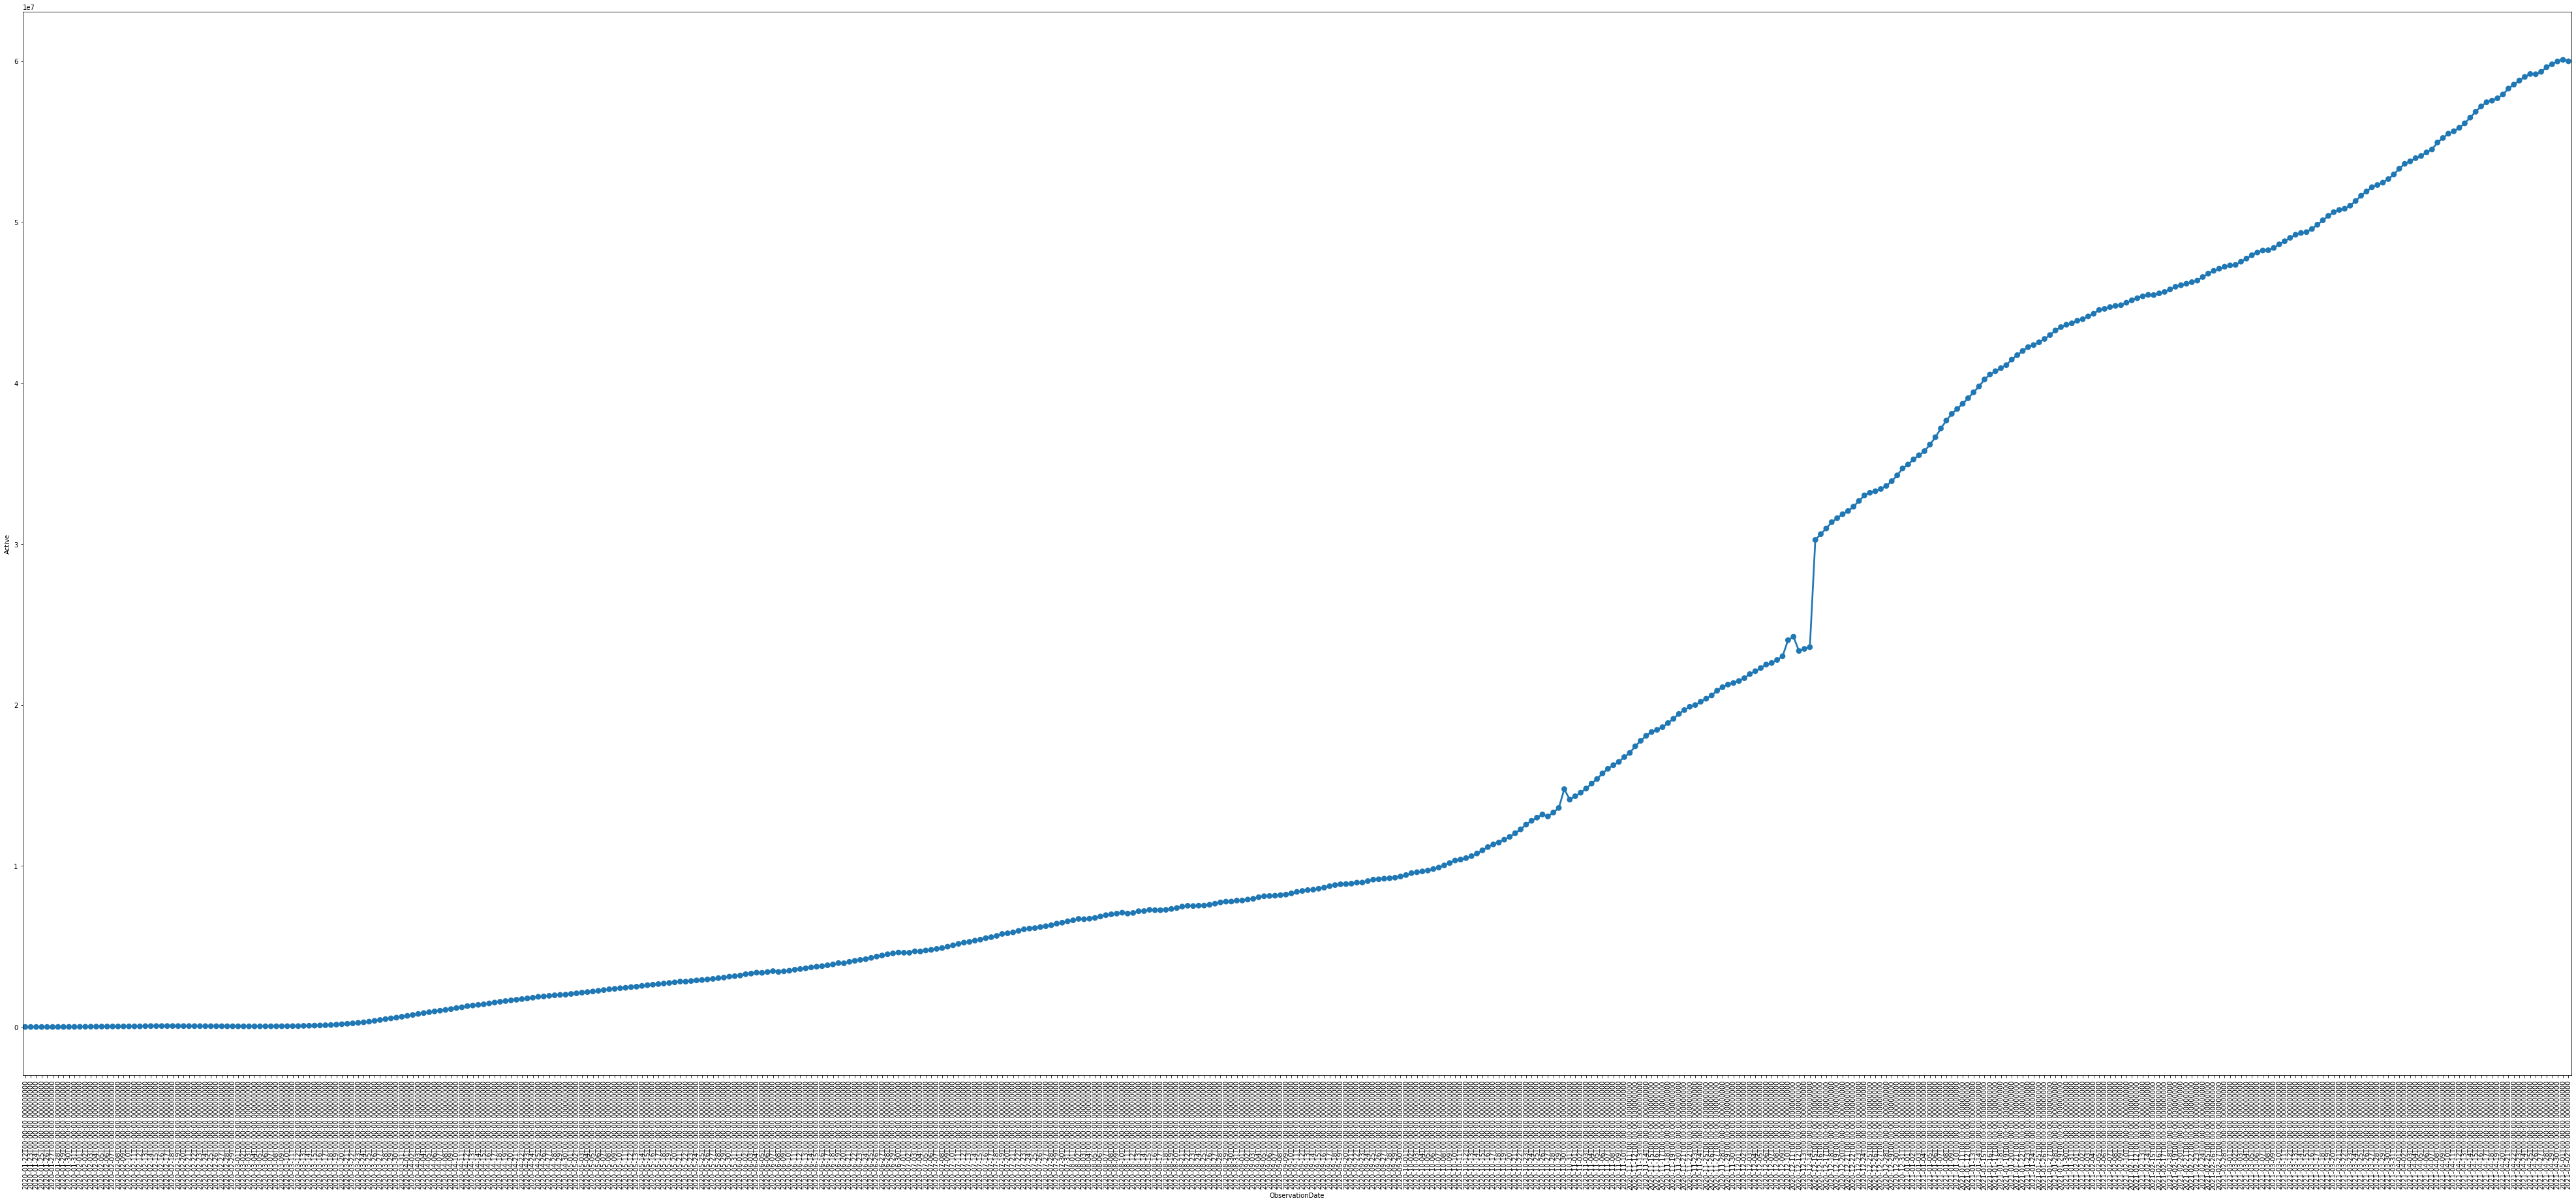

In [38]:
plt.figure(figsize=(70,30))
plt.xticks(rotation=90)
sns.pointplot(total_active["ObservationDate"], total_active["Active"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



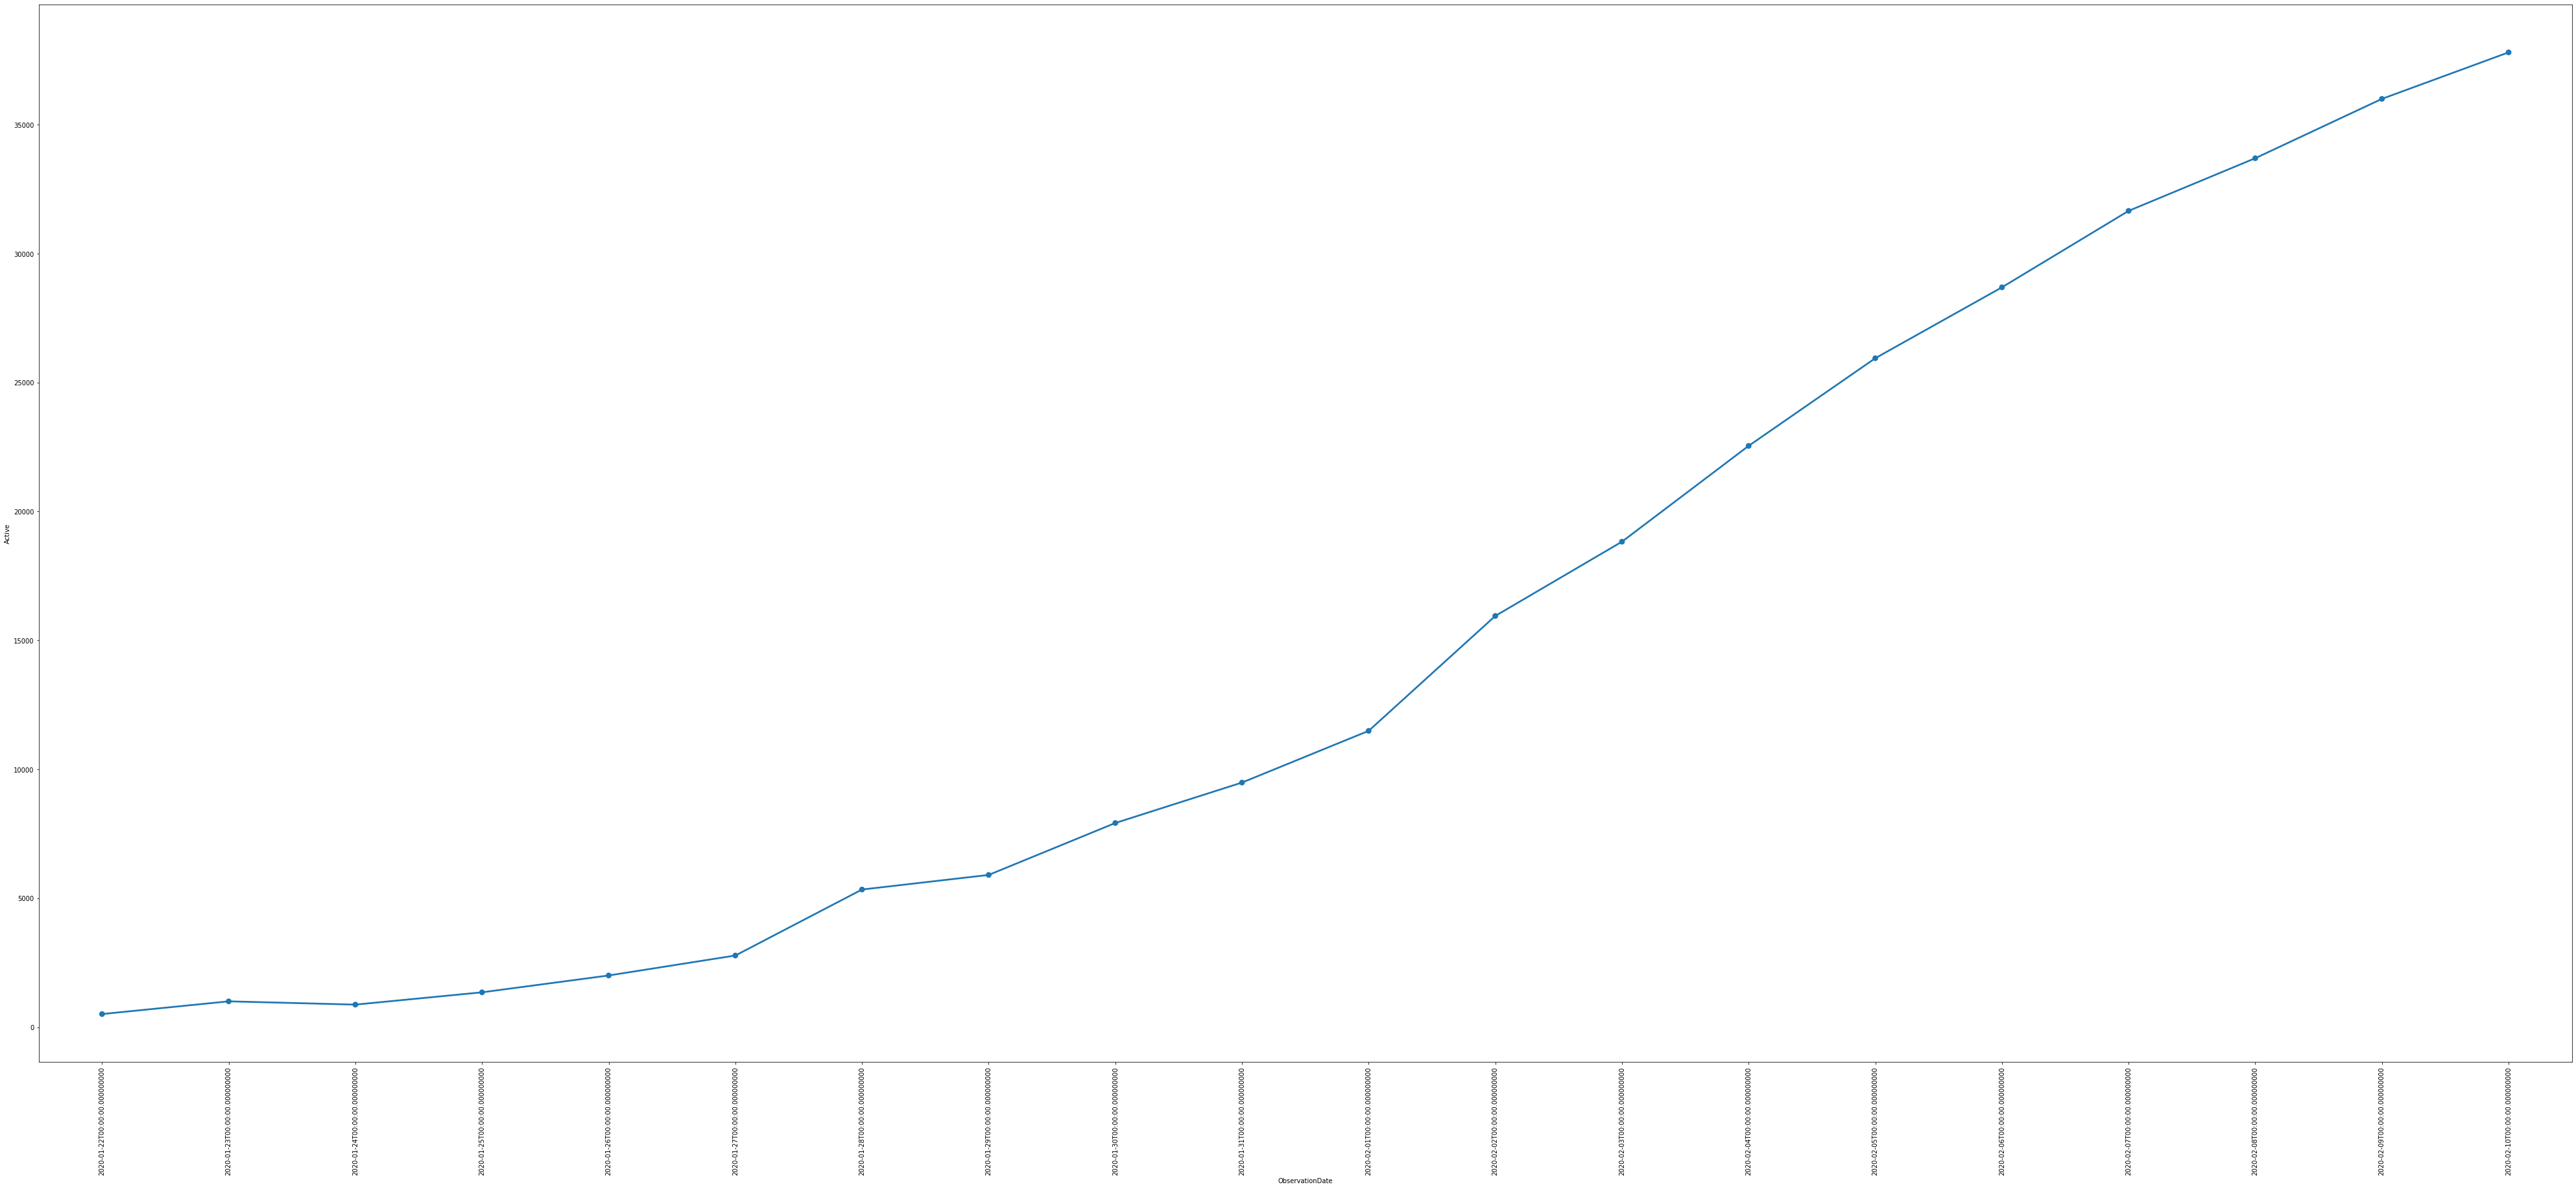

In [39]:
plt.figure(figsize=(70,30))
plt.xticks(rotation=90)
sns.pointplot(total_active["ObservationDate"].iloc[0:20], total_active["Active"].iloc[0:20])
plt.show()

In [40]:
data.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0


In [41]:
total_cases=data.groupby("ObservationDate")["Active","Confirmed","Deaths","Recovered"].sum().reset_index()
total_cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,ObservationDate,Active,Confirmed,Deaths,Recovered
0,2020-01-22,510.0,557.0,17.0,30.0
1,2020-01-23,1003.0,1097.0,34.0,60.0
2,2020-01-24,876.0,941.0,26.0,39.0
3,2020-01-25,1353.0,1437.0,42.0,42.0
4,2020-01-26,2006.0,2118.0,56.0,56.0
...,...,...,...,...,...
462,2021-04-28,59629150.0,149622864.0,3150675.0,86843039.0
463,2021-04-29,59804446.0,150520466.0,3165665.0,87550355.0
464,2021-04-30,59982291.0,151399480.0,3180238.0,88236951.0
465,2021-05-01,60084175.0,152196159.0,3192583.0,88919401.0


In [42]:
total_cases.head(2)

,ObservationDate,Active,Confirmed,Deaths,Recovered
0,2020-01-22,510.0,557.0,17.0,30.0
1,2020-01-23,1003.0,1097.0,34.0,60.0


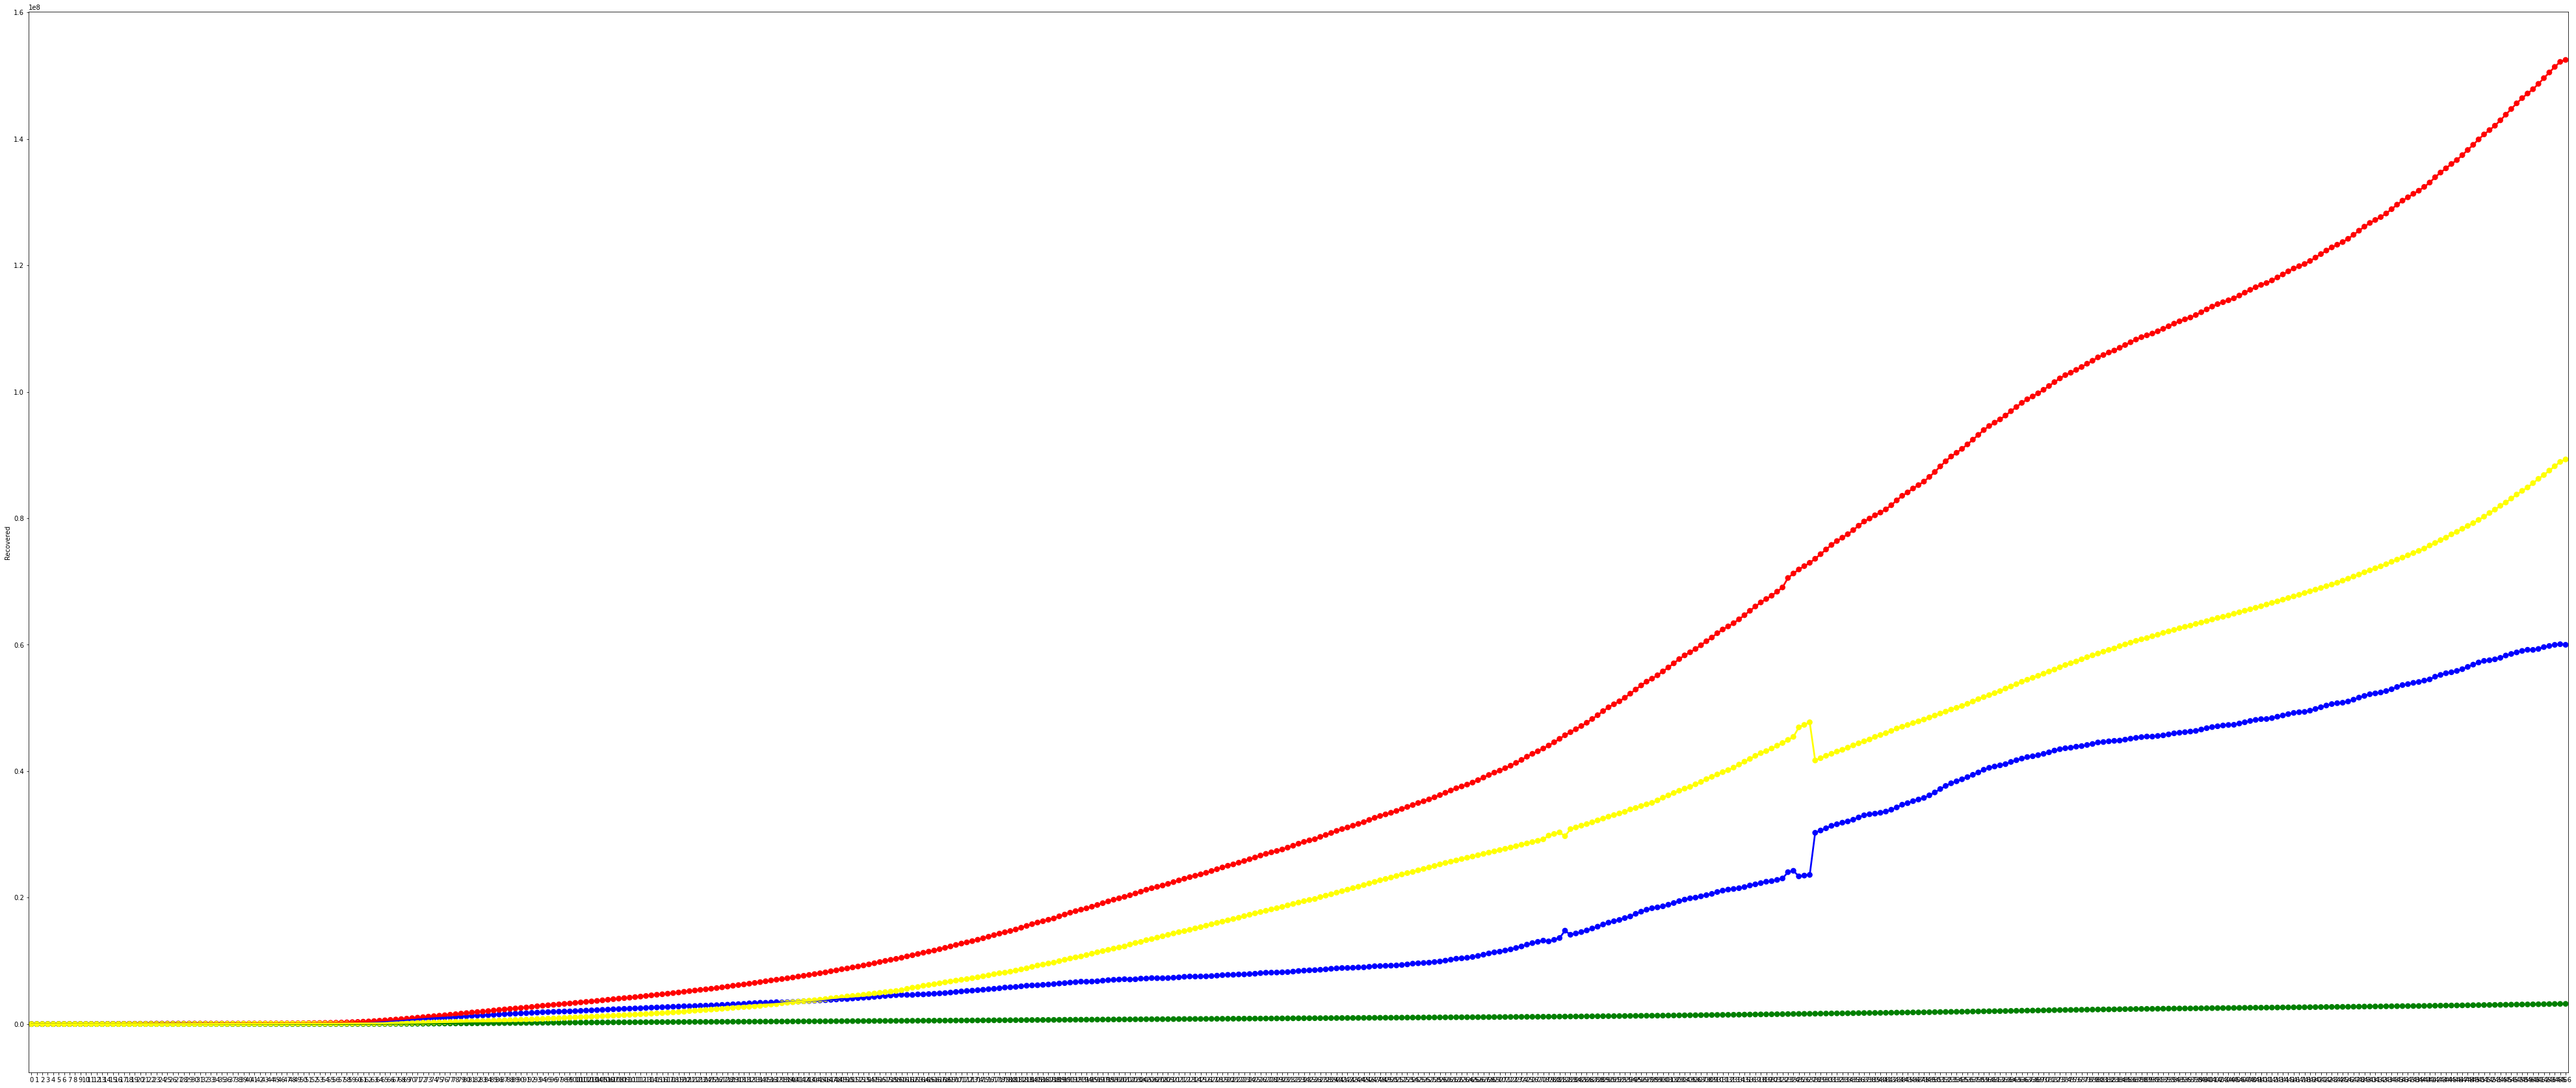

In [43]:
plt.figure(figsize=(70,30))
sns.pointplot(x=total_cases.index, y=total_cases["Active"],color="blue")
sns.pointplot(x=total_cases.index, y=total_cases["Confirmed"],color="red")
sns.pointplot(x=total_cases.index, y=total_cases["Deaths"],color="green")
sns.pointplot(x=total_cases.index, y=total_cases["Recovered"],color="yellow")
plt.show()

In [44]:
## lets chcek the top 20 countries which has maximum number of confirmed cases
top=latest.groupby('Country/Region')["Confirmed","Recovered"].sum()
top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Recovered
Country/Region,,
Afghanistan,60122.0,53391.0
Albania,131238.0,110920.0
Algeria,122522.0,85398.0
Andorra,13282.0,12753.0
Angola,26993.0,23913.0
...,...,...
Vietnam,2962.0,2549.0
West Bank and Gaza,297638.0,275392.0
Yemen,6341.0,2875.0


In [45]:
top=top.sort_values("Confirmed",ascending=False).reset_index()
top

,Country/Region,Confirmed,Recovered
0,US,32421534.0,0.0
1,India,19557457.0,15992271.0
2,Brazil,14754910.0,13083550.0
3,France,5713393.0,362043.0
4,Turkey,4875388.0,4480381.0
...,...,...,...
189,MS Zaandam,9.0,7.0
190,Vanuatu,4.0,3.0
191,Marshall Islands,4.0,4.0
192,Samoa,3.0,2.0


In [46]:
top_rec=top.sort_values("Recovered",ascending=False).reset_index()
top_rec

,index,Country/Region,Confirmed,Recovered
0,1,India,19557457.0,15992271.0
1,2,Brazil,14754910.0,13083550.0
2,4,Turkey,4875388.0,4480381.0
3,5,Russia,4768476.0,4393260.0
4,7,Italy,4044762.0,3492679.0
...,...,...,...,...
189,193,Micronesia,1.0,1.0
190,34,Serbia,691920.0,0.0
191,27,Sweden,973604.0,0.0
192,26,Belgium,995562.0,0.0


In [47]:
top_20=top.head(20)

In [48]:
data.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0


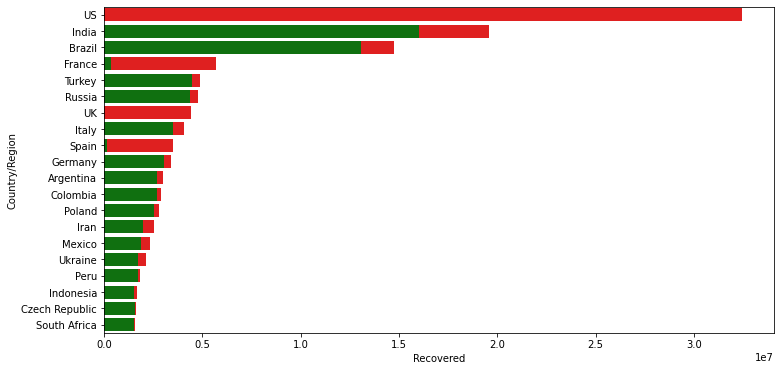

In [49]:
## lets plot in the graph
plt.figure(figsize=(12,6))
sns.barplot(x=top_20["Confirmed"], y=top_20["Country/Region"],color='red',label="Confirmed")
sns.barplot(x=top_20["Recovered"], y=top_20["Country/Region"],color='green',label="Recovered")
##sns.barplot(x=top_20["Active"], y=top_20["Country/Region"],color='blue',label="Active")
plt.show()

In [50]:
## Result: on the 2nd may US----confirmed---not recoverd
## India==

In [51]:
## home work ===The state in India which has the highest active case...???

In [52]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,0.0


In [53]:
## filtering
India_data=data[data["Country/Region"]=='India']
India_data = India_data.set_index('Province/State')
India_data = India_data.rename(index={'UNKNOWN':'Maharashtra','Unknown':'Maharashtra'})
India_data

,SNo,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active
Province/State,,,,,,,
Maharashtra,439,2020-01-30,India,1.0,0.0,0.0,1.0
Maharashtra,501,2020-01-31,India,1.0,0.0,0.0,1.0
Maharashtra,558,2020-02-01,India,1.0,0.0,0.0,1.0
Maharashtra,619,2020-02-02,India,2.0,0.0,0.0,2.0
Maharashtra,685,2020-02-03,India,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
Tripura,285230,2021-05-02,India,35589.0,398.0,33720.0,1471.0
Maharashtra,285245,2021-05-02,India,0.0,0.0,0.0,0.0
Uttar Pradesh,285256,2021-05-02,India,1282504.0,12874.0,967797.0,301833.0


In [54]:
##find the different states for the number of the cases
## we have to find the state having highest number of cases
## the top 20 states
## plot the bar graphs
## world map will not work..


In [64]:
state_record=India_data.groupby('Province/State')["Confirmed", "Recovered", "Active", "Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False)
state_record 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Province/State,Confirmed,Recovered,Active,Deaths
21,Maharashtra,543204861.0,470936429.0,59334655.0,12933777.0
16,Karnataka,223646785.0,203642249.0,17044072.0,2960464.0
1,Andhra Pradesh,216125745.0,204453292.0,9912817.0,1759636.0
31,Tamil Nadu,208899802.0,196005624.0,9792154.0,3102024.0
17,Kerala,181667868.0,163471672.0,17487510.0,708686.0
34,Uttar Pradesh,145199473.0,131081132.0,12075883.0,2042458.0
9,Delhi,145080563.0,135735173.0,6807409.0,2537981.0
36,West Bengal,123580178.0,114698725.0,6683500.0,2197953.0
26,Odisha,77142732.0,73149896.0,3588649.0,404187.0
32,Telangana,70768082.0,65345315.0,5020530.0,402237.0


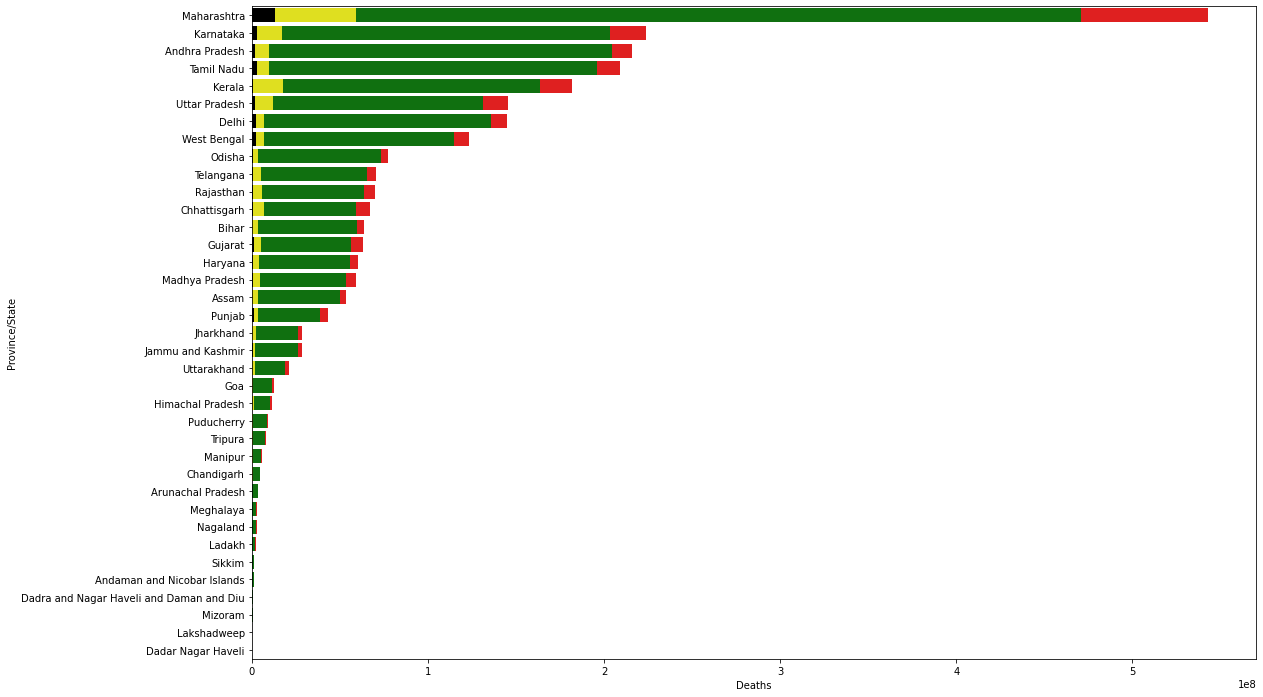

In [56]:
plt.figure(figsize=(18,12))
sns.barplot(x=state_record["Confirmed"], y=state_record["Province/State"],color='red',label="Confirmed")
sns.barplot(x=state_record["Recovered"], y=state_record["Province/State"],color='Green',label="Confirmed")
sns.barplot(x=state_record["Active"], y=state_record["Province/State"],color='Yellow',label="Confirmed")
sns.barplot(x=state_record["Deaths"], y=state_record["Province/State"],color='Black',label="Confirmed")